In [1]:
import glob
import os,shutil,sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import time #sleep 用

## 自己寫的函式庫(匯入使用)

In [3]:
import CompareImageII
import Harr
f1='OG001.jpg'
f2='OG008.jpg'
#一定要"/"，這個方向
file1='Screen/transport/OG/'+f1
file2='Screen/transport/OG/'+f2
print(CompareImageII.CompareAlgo(file1,file2))
  
file3='Screen/transport/'+f1
file4='Screen/transport/'+f2
img1=cv2.imread(file3)
img2=cv2.imread(file4)
print(CompareImageII.calculate(img1,img2))

False
[0.549502]


## 步驟1:將影像切割左邊右邊

In [25]:
path='C:\\Users\\2102048\\Desktop\\CutImage\\'
Filelist=glob.glob(path+'*.jpg')
#依次讀取陣列裡面的每個檔案，並一一開啟來處理
for i,f in enumerate(Filelist):
    #開一個檔案
    img=cv2.imread(f)
    #取檔名
    filename=(f.split('\\'))[-1]
    #去除副檔名
    name=filename[:-4]
    #設定座標取左
    #[[605,500],[0,500],[0,0],[605,0]]
    point_left_1=(0,0)
    point_left_2=(500,500)
    crop_left=img[point_left_1[1]:point_left_2[1],point_left_1[0]:point_left_2[0]]
    save_left=name+'_01.jpg'
    cv2.imwrite('Screen/OG/OK_cutting/'+save_left,crop_left)
    print(save_left)
    #設定座標取右
    #[[1210,500],[605,500],[605,0],[1210,0]]
    point_right_1=(610,0)
    point_right_2=(1110,500)
    crop_right=img[point_right_1[1]:point_right_2[1],point_right_1[0]:point_right_2[0]]
    save_right=name+'_02.jpg'
    cv2.imwrite('Screen/OG/OK_cutting/'+save_right,crop_right)
    print(save_right)

15-12-50_Y3VA_One_01.jpg
15-12-50_Y3VA_One_02.jpg
15-12-50_Y3VA_Two_01.jpg
15-12-50_Y3VA_Two_02.jpg
15-28-28_Y3RA_One_01.jpg
15-28-28_Y3RA_One_02.jpg
15-28-28_Y3RA_Two_01.jpg
15-28-28_Y3RA_Two_02.jpg
15-38-08_Y3AA_One_01.jpg
15-38-08_Y3AA_One_02.jpg
15-38-08_Y3AA_Two_01.jpg
15-38-08_Y3AA_Two_02.jpg
15-52-19_Y3BA_One_01.jpg
15-52-19_Y3BA_One_02.jpg
15-52-19_Y3BA_Two_01.jpg
15-52-19_Y3BA_Two_02.jpg
15-56-37_Y3DA_One_01.jpg
15-56-37_Y3DA_One_02.jpg
15-56-37_Y3DA_Two_01.jpg
15-56-37_Y3DA_Two_02.jpg
16-02-44_Y3FA_One_01.jpg
16-02-44_Y3FA_One_02.jpg
16-02-44_Y3FA_Two_01.jpg
16-02-44_Y3FA_Two_02.jpg
16-06-56_Y3GA_One_01.jpg
16-06-56_Y3GA_One_02.jpg
16-06-56_Y3GA_Two_01.jpg
16-06-56_Y3GA_Two_02.jpg
16-11-13_Y3HA_One_01.jpg
16-11-13_Y3HA_One_02.jpg
16-11-13_Y3HA_Two_01.jpg
16-11-13_Y3HA_Two_02.jpg
16-14-50_Y3JA_One_01.jpg
16-14-50_Y3JA_One_02.jpg
16-14-50_Y3JA_Two_01.jpg
16-14-50_Y3JA_Two_02.jpg
16-18-41_Y3KA_One_01.jpg
16-18-41_Y3KA_One_02.jpg
16-18-41_Y3KA_Two_01.jpg
16-18-41_Y3KA_Two_02.jpg


## 步驟2:Sikulix 擴增資料(裁減上下)

In [21]:
path='C:\\Users\\2102048\\pythonCV\\Screen\\OG\\OK_cutting\\'
filelist=glob.glob(path+'*.jpg')
#423*500下去裁減
for i,f in enumerate(filelist):
    #開一個檔案
    img=cv2.imread(f)
    #取檔名
    filename=(f.split('\\'))[-1]
    #去除副檔名
    name=filename[:-7]   
    
    #第一種裁減尺寸(裁左方、上方影像)
    point1_1=(20,20)
    point1_2=(500,500)
    #設定裁切區域
    cutting_1=img[point1_1[1]:point1_2[1],point1_1[0]:point1_2[0]]
    save_cutting_1=name+"_03.jpg"
    print(save_cutting_1)
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_1,cutting_1)
    
    #第二種裁減尺寸(裁減右方、下方影像)
    point2_1=(0,0)
    point2_2=(480,480)
    cutting_2=img[point2_1[1]:point2_2[1],point2_1[0]:point2_2[0]]
    save_cutting_2=name+"_04.jpg"
    print(save_cutting_2)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_2,cutting_2)
    
    #第三種
    point3_1=(30,30)
    point3_2=(500,500)
    cutting_3=img[point3_1[1]:point3_2[1],point3_1[0]:point3_2[0]]
    save_cutting_3=name+"_05.jpg"
    print(save_cutting_3)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_3,cutting_3)
    #第四種
    point4_1=(0,0)
    point4_2=(480,480)
    cutting_4=img[point4_1[1]:point4_2[1],point4_1[0]:point4_2[1]]
    save_cutting_4=name+"_06.jpg"
    print(save_cutting_4)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_4,cutting_4)
    
    #第五種
    point5_1=(0,20)
    point5_2=(480,480)
    cutting_5=img[point5_1[1]:point5_2[1],point5_1[0]:point5_2[0]]
    save_cutting_5=name+"_07.jpg"
    print(save_cutting_5)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_5,cutting_5)
    
    #第六種
    point6_1=(20,0)
    point6_2=(480,480)
    cutting_6=img[point6_1[1]:point6_2[1],point6_1[0]:point6_2[0]]
    save_cutting_6=name+"_08.jpg"
    print(save_cutting_6)
    cv2.imwrite('Screen/OG/OK_cutting/test/'+save_cutting_6,cutting_6)
    

t001_03.jpg
t001_04.jpg
t001_05.jpg
t001_06.jpg
t001_07.jpg
t001_08.jpg
t002_03.jpg
t002_04.jpg
t002_05.jpg
t002_06.jpg
t002_07.jpg
t002_08.jpg
t003_03.jpg
t003_04.jpg
t003_05.jpg
t003_06.jpg
t003_07.jpg
t003_08.jpg
t004_03.jpg
t004_04.jpg
t004_05.jpg
t004_06.jpg
t004_07.jpg
t004_08.jpg
t005_03.jpg
t005_04.jpg
t005_05.jpg
t005_06.jpg
t005_07.jpg
t005_08.jpg
t006_03.jpg
t006_04.jpg
t006_05.jpg
t006_06.jpg
t006_07.jpg
t006_08.jpg
t007_03.jpg
t007_04.jpg
t007_05.jpg
t007_06.jpg
t007_07.jpg
t007_08.jpg
t008_03.jpg
t008_04.jpg
t008_05.jpg
t008_06.jpg
t008_07.jpg
t008_08.jpg


## 步驟2:Sikulix 擴增資料(光影變化)

In [19]:
def modify_lightness_saturation(img):
    OG_img=img
    #轉服點數
    fImg=img.astype(np.float32)
    #影像正規化
    fImg=fImg/255.0
    
    #色彩空間轉換
    hls_img=cv2.cvtColor(fImg,cv2.COLOR_BGR2HLS)
    hlsCopy=np.copy(hls_img)
    
    #調整亮度，1(+-)多少%
    lightness=0
    #調整飽和度，1(+-)多少%
    saturation=300
    
    #開始調整
     # 亮度調整，[:,:,1]從0開始
    hlsCopy[:, :, 1] = (1 + lightness / 100.0) * hlsCopy[:, :, 1]
    hlsCopy[:, :, 1][hlsCopy[:, :, 1] > 1] = 1  #介於 0~1，計算出來超過1 = 1
    ##
    print(hlsCopy[:,:,1])
    ##
    # 飽和度調整
    hlsCopy[:, :, 2] = (1 + saturation / 100.0) * hlsCopy[:, :, 2]
    hlsCopy[:, :, 2][hlsCopy[:, :, 2] > 1] = 1  #介於 0~1，計算出來超過1 = 1

    # 顏色空間反轉換 HLS -> BGR 
    result_img = cv2.cvtColor(hlsCopy, cv2.COLOR_HLS2BGR)
    result_img = ((result_img * 255).astype(np.uint8))

    titles=['img','Highr Saturation']
    images=[OG_img,result_img]
    #用for來組合名稱跟圖檔
    for i in range(len(images)):
        #1row * 2column
        plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

[[0.51176476 0.5156863  0.5156863  ... 0.53333336 0.53333336 0.53333336]
 [0.50784314 0.5156863  0.5196079  ... 0.5254902  0.5254902  0.52156866]
 [0.51176476 0.5156863  0.5156863  ... 0.5254902  0.5254902  0.5254902 ]
 ...
 [0.37843138 0.37843138 0.37843138 ... 0.41960785 0.41960785 0.41960785]
 [0.5588236  0.5588236  0.5588236  ... 0.56078434 0.56078434 0.56078434]
 [0.5764706  0.5764706  0.5764706  ... 0.55490196 0.55490196 0.55490196]]
High Saturation:


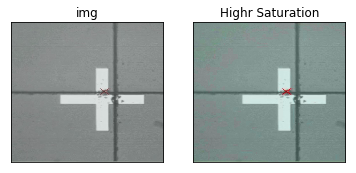

In [20]:
img=cv2.imread('Screen\\OG\\OK_cutting\\16-27-53_Y3MA_Two_08.jpg')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
modify_lightness_saturation(img)

In [ ]:
path='C:\\Users\\2102048\\pythonCV\\Screen\\OG\\OK_cutting\\'
filelist=glob.glob(path+'*.jpg')
#423*500下去裁減
for i,f in enumerate(filelist):
    #開一個檔案
    img=cv2.imread(f)
    #取檔名
    filename=(f.split('\\'))[-1]
    #去除副檔名
    name=filename[:-7]
    #正規化
    light_img=img/255.0
    #色彩轉換
    hls_img=cv2.cvtColor(light_img,cv2.COLOR_BAYER_BG2HLS)
    #亮度設定
    lightness=5
    #飽和度設定
    saturation=300
    his_img[:,:,-1]

## 步驟3:Sikulix後影像前處理(非必要)

In [7]:
'''
#圖片,要不要存檔
def ImageProcess(imgpath):
    #灰階讀進
    img=cv2.imread(f,cv2.IMREAD_GRAYSCALE)

    #膨脹
    kernel = np.ones((1,1), np.uint8)
    dilate = cv2.dilate(img, kernel, iterations = 1)
    
    kernelN=np.ones((11,11),np.uint8)
    Negtive=cv2.erode(image_mid_blur,kernelN,iterations=1)
    
    Gaussian=cv2.GaussianBlur(Negtive,(1,1),50)
    usm = cv2.addWeighted(Negtive, 1.5, Gaussian, -0.5, 0)
    
    cv2.imwrite('Screen/OG/OK_cutting/test/'+imgpath.split("\\")[-1],usm)
'''

In [17]:
#讀進檔案進行預處理
#使用(要先在path之下建立test資料夾)
path='C:\\Users\\2102048\\pythonCV\\Screen\\OG\\OK_cutting\\'
#讀進所有jpg檔案
photolist=glob.glob(path+'*.jpg')
#一張一張處理掉雜質(碎削、對位置藍色x點)
for i,f in enumerate(photolist):
    filename=f.split("\\")[-1]
    #灰階讀進
    img=cv2.imread(path+filename,0)

    #膨脹
    kernel = np.ones((5,5), np.uint8)
    dilate = cv2.dilate(img, kernel, iterations = 1)
    
    #降噪(中值濾波)，彌平紅線條
    image_mid_blur =cv2.medianBlur(dilate, 9) 
    cv2.imwrite('Screen/OG/OK_cutting/test/'+filename,dilate)

## (選用) Sikulix 專用資料夾處理

In [4]:
#建立資料夾
def emptydir(dirname):
    if os.path.isdir(dirname):
        shutil.rmtree(dirname)
        print("已刪除重建",dirname,"資料夾")
        sleep(2)
    
    os.mkdir(dirname)
    print("建立",dirname)    
#搬移檔案
def movefile(src_path,des_path):
    for fname in os.listdir (src_path):
        shutil.move(os.path.join(src_path,fname),des_path)

In [70]:
#使用搬移檔案功能，將src_path該層檔案移置des_path
#參數(原始路徑,搬移路徑)
def movefile(src_path,des_path):
    for fname in os.listdir(src_path):
    shutil.move(os.path.join(src_path,fname),des_path)
    
#輸入片號資料夾
panelFile="2021-03-30 15-12-50_Y3VA"
#建立資料夾
emptydir(panelFile)
#建立子資料價
subfile=["One","Two"]
for i in subfile:
    TypeFile="Screen/transport/"+panelFile+"/"+i
    emptydir(TypeFile)
    #從Sikulix公用處取檔案
    movefile("Screen/transport/"+i,TypeFile)
    
for i in subfile:
    #從子類別搬到父類別
    movefile("Screen/transport/"+panelFile,"Screen/transport/"+panelFile+"/"+i

建立 2021-03-30 15-12-50_Y3VA
建立 2021-03-30 15-12-50_Y3VA/Type1
建立 2021-03-30 15-12-50_Y3VA/Type2
建立 2021-03-30 15-12-50_Y3VA/Type3
建立 2021-03-30 15-12-50_Y3VA/Type4


## 尋找黑色元素(3/22測試)，暫時用不到

In [4]:
def replace_color_tran(img, src_clr):
    #要用cv2.imread來開檔案，不然會有src錯誤
    Count_Black=0
    ret,thresh1 = cv2.threshold(img,100,200,cv2.THRESH_BINARY)
    print("Binary_Inv")
    #Test 1，有問題
    contours,hierarchy=cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2,drawContours(img,contours,-1,(0,0,255),3)
    
    cv2.imshow("img", img)  
    cv2.waitKey(0) 

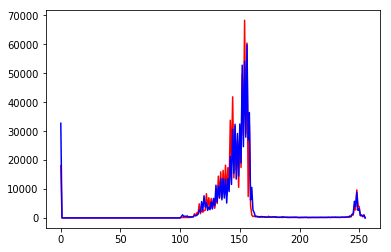

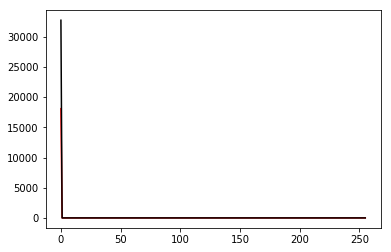

In [108]:
img=cv2.imread('Screen/transport/OG003.jpg',0)
img_cut=cv2.imread('Screen/transport/OG008.jpg',0)
UP=255;LOWER=100
#像素多的二值化
ret,thresh1=cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)
ret,thresh2=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_TOZERO)
hist1 = cv2.calcHist([thresh1],[0],None,[256],[0.0,255.0]) 
hist2 = cv2.calcHist([thresh2],[0],None,[256],[0.0,255.0]) 
plt.plot(range(256),hist1,'r') 
plt.plot(range(256),hist2,'b') 
plt.show() 
#只留黑色切割
ret,thresh3=cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY)
ret,thresh4=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY)
hist3=cv2.calcHist([thresh3],[0],None,[256],[0.0,255.0])
hist4=cv2.calcHist([thresh4],[0],None,[256],[0.0,255.0])
plt.plot(range(256),hist3,'r')
plt.plot(range(256),hist4,'k')
#只留白色切割
ret,thresh5=cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY_INV)
ret,thresh6=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY_INV)

## 步驟6:過濾的影像預處理(二值化處理)
##### 效果評估(選一個方法處理)比對尋找一刀兩刀

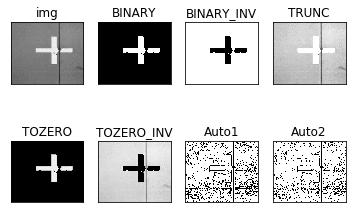

In [49]:
img1 = cv2.imread('Screen/OG/OK_cutting/15-12-50_Y3VA_One_01.jpg',0)
img= cv2.imread('Screen/transport/One_000_02.jpg',0)
#img1 = cv2.imread('Screen/OG/OK_cutting/test/15-12-50_Y3VA_One_01.jpg',0)
#(影像,分類閥值,賦予新值,選擇參數)
UP=200
LOWER=160
ret,thresh1 = cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TRUNC)

ret,thresh4 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)

ret,thresh42 =cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)

ret,thresh5 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(img,LOWER,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(img,LOWER,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#存檔
cv2.imwrite('Screen/transport/binary/TRUNC05.jpg',thresh3)
    
titles = ['img','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','Auto1','Auto2']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7]
for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 步驟6:算黑色元素(用numpy處理)

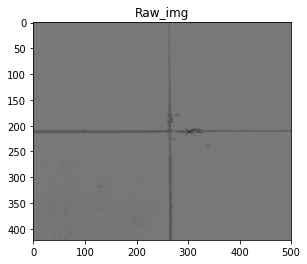

width_500,height_422
width_500,height_422
(211000,)


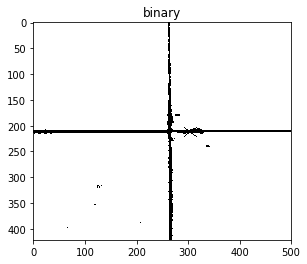

In [7]:
#順序，先轉成二值化閥值，僅有0或255，再將影像轉成numpy，之後遍部numpy找尋0(黑色元素)
#並且統計一條黑色元素跟兩條黑色元素的差異，來判斷有切沒切

#開第5步驟預處理的資料夾
path='Screen//transport//binary//*'
#讀出資料夾內檔案
#file=glob.glob(path+'.jpg')
f='Screen//transport//binary//TRUNC02.jpg'
#依序讀出檔案(i為順序，f為檔名)
#for i,f in enumerate(file):
#開檔案
image=Image.open(f)
#轉灰階
image_gray=Image.open(f).convert('L')
image_raw=cv2.imread(f,0)
#色彩空間轉換
image_raw=cv2.cvtColor(image_raw,cv2.COLOR_BGRA2RGB)
###
#轉換讓matlab認識灰階
plt.imshow(image_raw,cmap='gray')
plt.title('Raw_img')
plt.show()
width,heigh=image.size
print('width_{},height_{}'.format(width,heigh))
###
    
#算影像的長度
width,heigh=image_gray.size
print('width_{},height_{}'.format(width,heigh))
    
#宣告放黑色元素array
Black_Pixel=[]
#遍部所有pixel，0黑、255白
for y in range(heigh):
    for x in range(width):
        #取出pixel
        pixel=image_gray.getpixel((x,y))
        if pixel>110:
            pixel=255
        else:
            pixel=0
        #加到array
        Black_Pixel.append(pixel)
####
ary=np.array(Black_Pixel)
#print維度要numpy
print(ary.shape)
#此時ary的shap矩陣為(211000,)代表211000x1的一維矩陣
####

#計算切割的黑色像素


#numpy轉圖
picture=ary.reshape(heigh,width)
im_bin=Image.fromarray(picture)
#儲存測試結果成csv，
#將結果儲存成CSV檔案，注意只能存一次，會呈現只有切割線是255(黑色)，其他地方都是0(白色)
pd.DataFrame(picture).to_csv('C://Users//2102048/pythonCV//Screen//transport//binary//Bin.cvs')

#使用matlab要加顏色映射的函數
plt.imshow(im_bin,cmap='gray')
plt.title('binary')
plt.show()
    
   

## BubbleSort Test(示範)

In [82]:
def bubbleSort(arr): 
    #算array長度
    n = len(arr)  
    #倆倆比對長度減1次
    for i in range(n-1): 
    # 倆倆比對長度減回合減1次
        for j in range(0, n-i-1): 
            # traverse the array from 0 to n-i-1 
            # Swap if the element found is greater 
            # than the next element 
            #if j跟j+1 比較為True 從排隊list刪除，進刪除list 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 


In [83]:
# Driver code to test above 
arr = [64, 34, 25, 12, 22, 11, 90] 
  
bubbleSort(arr) 
  
print ("Sorted array is:") 
for i in range(len(arr)): 
    print ("%d" %arr[i])

Sorted array is:
11
12
22
25
34
64
90


## 步驟7:兩兩過濾相似度比對

In [67]:
#比對等待(等待秒,截圖數量)
def sleep_compare(sec):
    #讀進前面截圖的資料
    filepath='Screen\\Test\\Type1\\'
    myfiles=glob.glob(filepath+'*.jpg')
    #宣告字典
    ImageArray=[]
    for i,f in enumerate(myfiles):
        #放到Arraay排隊
        ImageArray.append(f)
        print("檔案",ImageArray[i])
    #不能用len(Imagelist) 因int是不可以疊帶
    for i in ImageArray:
        #算數量
        count=0
        count+=1
    
    print("檔案",ImageArray)
    try:
        #判斷裡面沒大於2張無法比較
        #if len(ImageArray)<=1:
            #print("End")
        #如果超過兩張就兩兩比較
        if len(ImageArray)>=2:
            print("Start")
            #兩兩拉出 1跟2比，2跟3比，3跟4比
            N=len(ImageArray)-1
            #從i=0，j=0開始
            for  i in range(N):
                    print("///////比對///////",i+1,"次///////////////")
                    print("///////此次///////",ImageArray)
                #判斷裡面沒大於2張無法比較
                    if len(ImageArray)<1:
                        print("End 結束")
                    else:
                        
                        #取檔案順序
                        File1=0
                        File2=1
                        print("比對 開檔",i)

                        #從隊伍撈出來開檔案
                        img1=Image.open(ImageArray[File1])
                        print('//1//',ImageArray[File1])
                        #取檔名
                        File1Name=str(ImageArray[File1]).split("\\")[-1]
                        #停頓
                        #await asyncio.sleep(sec)
                        #img1.show()
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File1]))
                        img2=Image.open(ImageArray[File2])
                        print('//2//',ImageArray[File2])
                        #取檔名
                        File2Name=str(ImageArray[File1]).split("\\")[-1]
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File2]))
                        #img2.show()
                        print("取檔案OK，開始比對圖片")
                        #比對相似度
                        rate=CompareImageII.CompareAlgo(ImageArray[File1],ImageArray[File2])
                        if(rate==True):

                            #RemoveFile=ImageArray[File1]
                            try:
                                #另存檔案
                                #注意斜線
                                img1.save('Screen\\Test\\double\\'+File1Name)
                                ImageArray.remove(str(ImageArray[File1]))
                            except OSError as e:
                                print(e)

                            print("相同 刪除",File1Name)
                        else:
                            ImageArray.remove(str(ImageArray[File1]))
                            ImageArray.remove(str(ImageArray[File2]))
                            print("不相同  刪除",File1," & ",File2)
    except EOFError as e:
        print("檔案錯誤",e)


    print("i結束",i)
                        
                    
    print(ImageArray)
        
        

In [68]:
sleep_compare(1)

檔案 Screen\Test\scan001.jpg
檔案 Screen\Test\scan002.jpg
檔案 Screen\Test\scan003.jpg
檔案 Screen\Test\scan005.jpg
檔案 Screen\Test\scan006.jpg
檔案 Screen\Test\scan007.jpg
檔案 Screen\Test\scan008.jpg
檔案 Screen\Test\scan04.jpg
檔案 ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
Start
///////比對/////// 1 次///////////////
///////此次/////// ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
比對 開檔 0
//1// Screen\Test\scan001.jpg
//2// Screen\Test\scan002.jpg
取檔案OK，開始比對圖片
相同 刪除 scan001.jpg
///////比對/////// 2 次///////////////
///////此次/////// ['Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan